In [1]:
#探索PLC文件不同分钟的细节
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

import os.path
import datetime
#训练文件夹
TrainFolder='H:\\12_Kaggle\\toollife\\01-TrainingData-qLua'
TestFolder='H:\\12_Kaggle\\toollife\\02-TestingData-additional'

In [43]:
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [44]:
#3d图 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

In [6]:
TrainFolder01=os.path.join(TrainFolder,"01\\PLC")
TrainFolder02=os.path.join(TrainFolder,"02\\PLC")
TrainFolder03=os.path.join(TrainFolder,"03\\PLC")
#第一个PLC文件
Train01Plc=os.path.join(TrainFolder01,'plc.csv')
Train02Plc=os.path.join(TrainFolder02,'plc.csv')
Train03Plc=os.path.join(TrainFolder03,'plc.csv')

TestFileList=[]
for n in range(5):
    fend='0'+str(n+1)+'\\PLC\\plc.csv'
    f=os.path.join(TestFolder,fend)
    TestFileList.append(f)
TestFileList

['H:\\12_Kaggle\\toollife\\02-TestingData-additional\\01\\PLC\\plc.csv',
 'H:\\12_Kaggle\\toollife\\02-TestingData-additional\\02\\PLC\\plc.csv',
 'H:\\12_Kaggle\\toollife\\02-TestingData-additional\\03\\PLC\\plc.csv',
 'H:\\12_Kaggle\\toollife\\02-TestingData-additional\\04\\PLC\\plc.csv',
 'H:\\12_Kaggle\\toollife\\02-TestingData-additional\\05\\PLC\\plc.csv']

In [7]:
df_all=pd.read_csv(TestFileList[0])

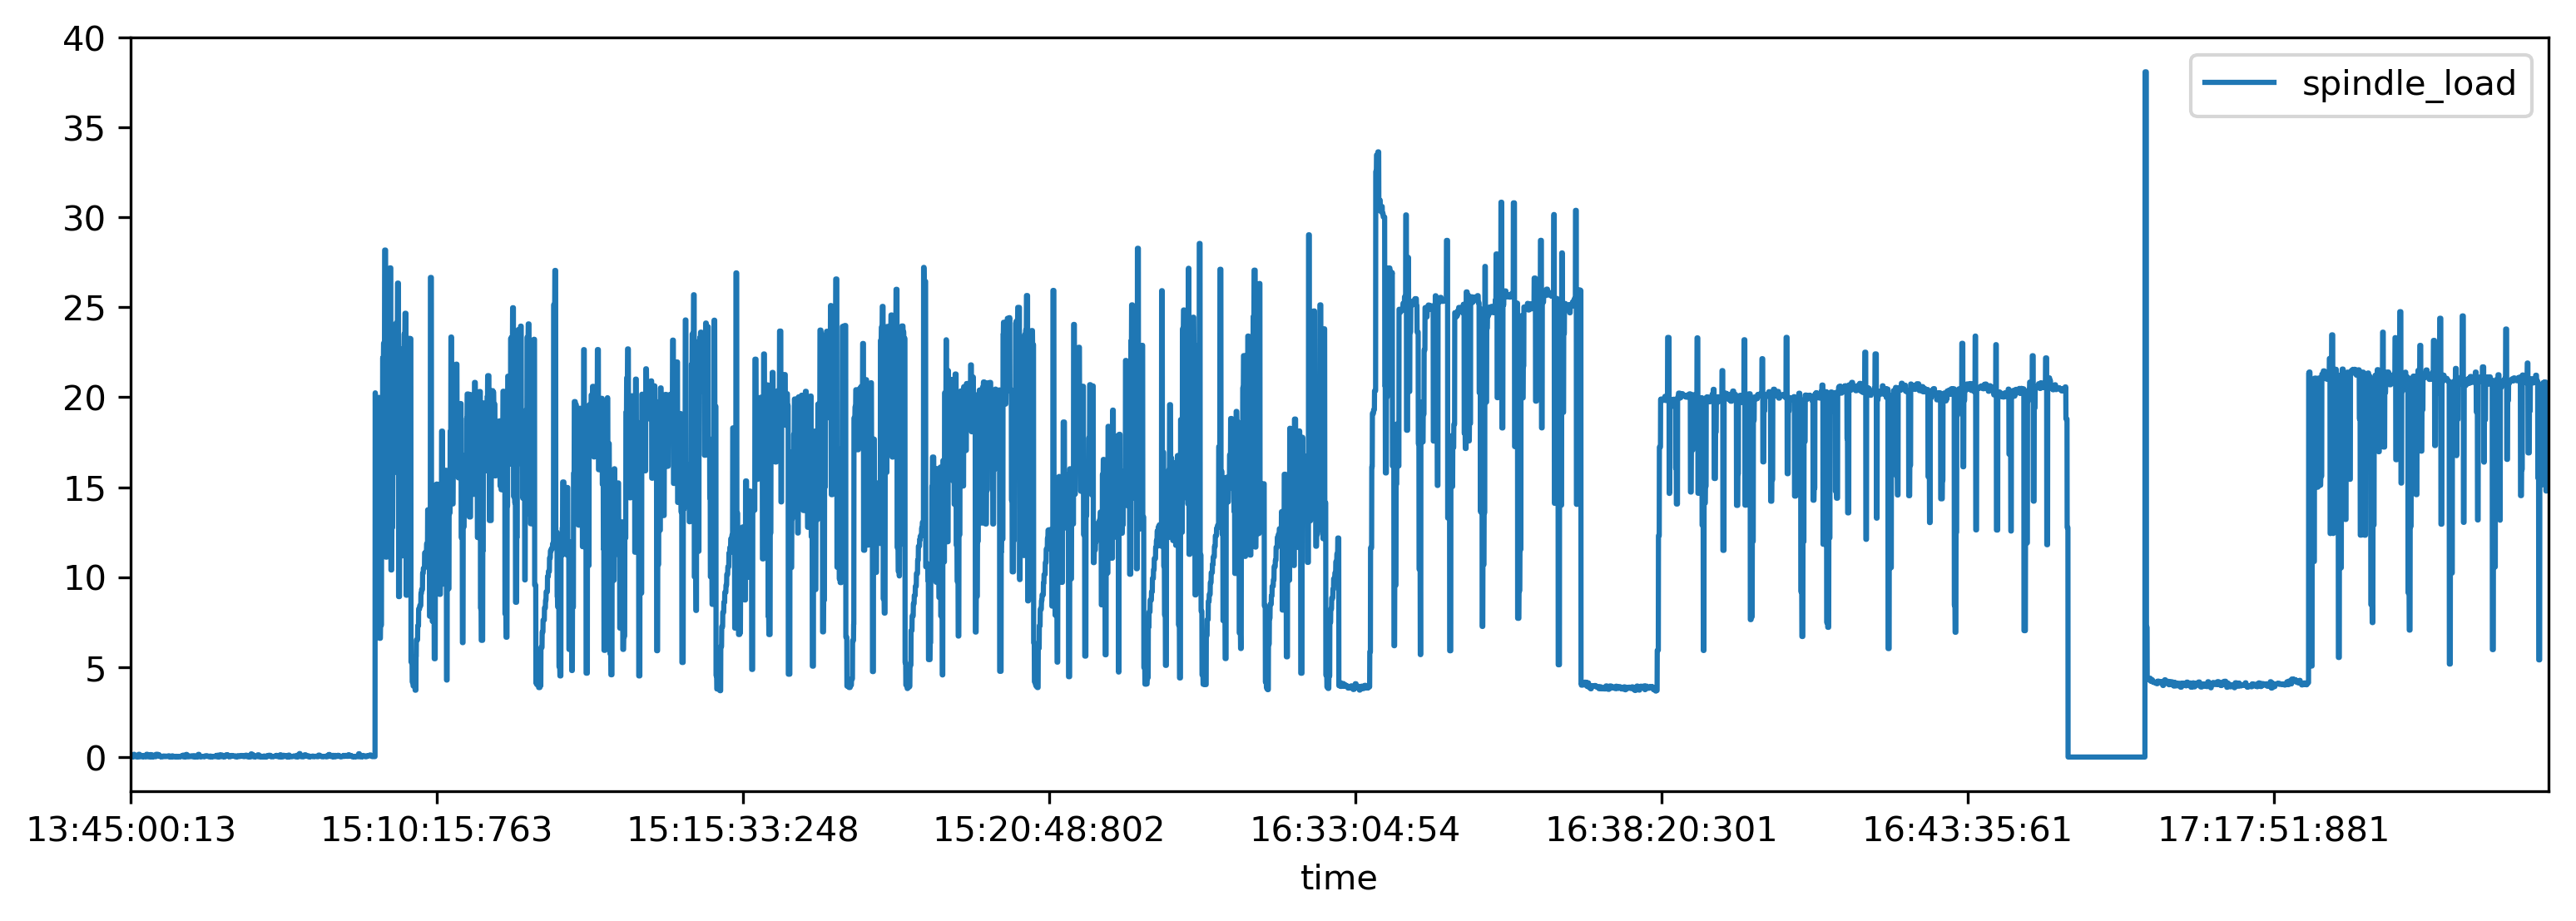

In [8]:

df_all.head(3)
df_all.plot('time','spindle_load')

In [9]:
#每一个df分别是1分钟
#需要将位置数据转化为速度数据，x,y,z方向的数据
#需要给整个df每一行添加一些新的feature，方向是否改变【0,1】，方向改变【0,x,y,z,xy,xz,yz,xyz...】

#读入PLC文件
df_all=pd.read_csv(TestFileList[0])

dflist=[]
for i in range(1,49):
    dfi=df_all[df_all.csv_no == i]
    dflist.append(dfi)



# 每分钟的主轴压力情况，x，y，z的运动情况

In [11]:
num=34
df=dflist[num]
df0=dflist[num-1]

x=df['x']
x0=df0['x']
y=df['y']
y0=df0['y']
z=df['z']
z0=df0['z']
load=df['spindle_load']
t=df['time']


NameError: name 'speed' is not defined

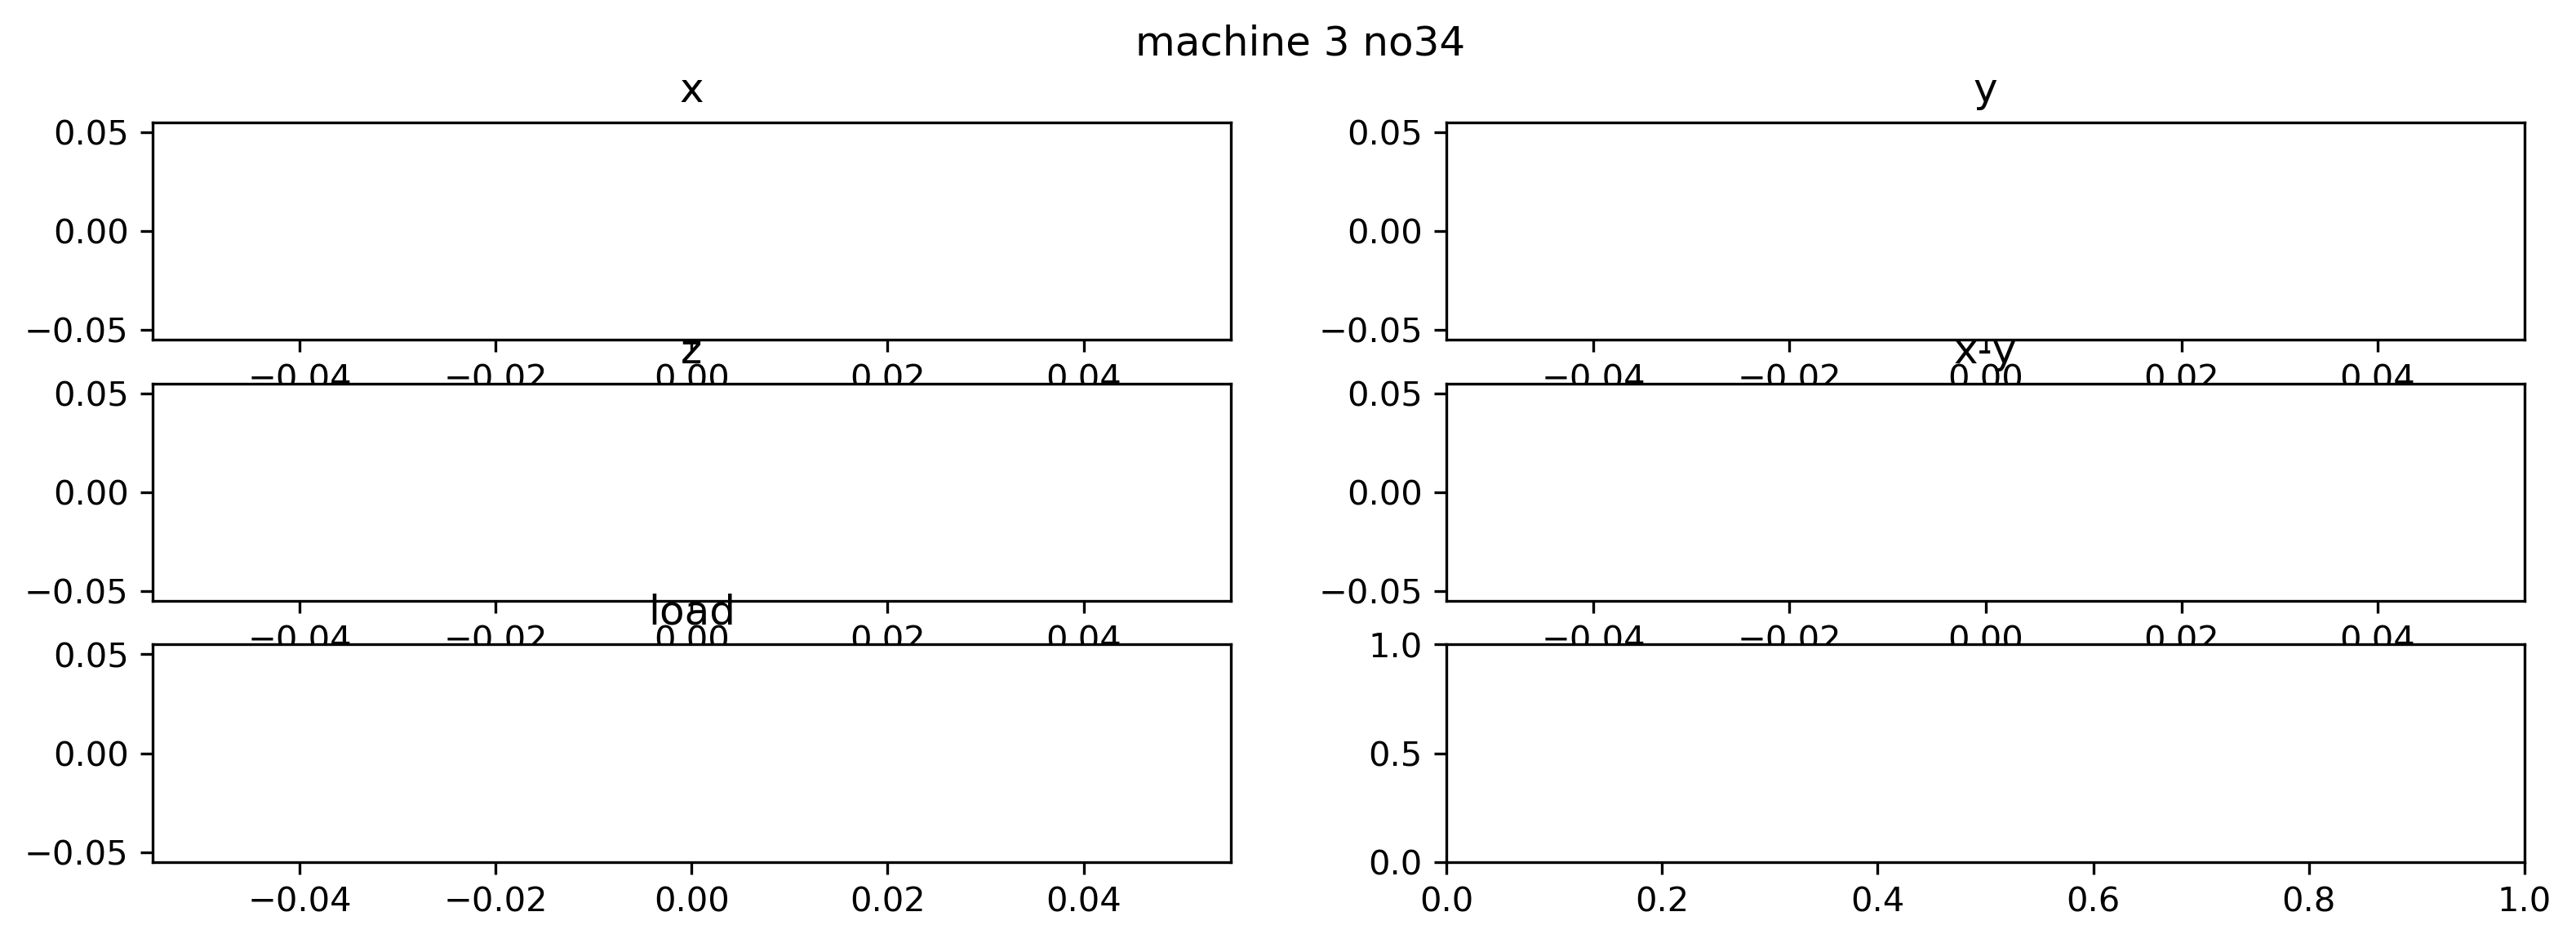

In [12]:
#一个整体的plot
fig,ax=plt.subplots(3,2)
plt.suptitle('machine 3 no'+str(num))
fig.size=(30,30)
ax=ax.flatten()
ax[0].plot(x,label='x',color='r')
ax[0].set_title('x')
ax[1].plot(y,color='y')
ax[1].set_title('y')
ax[2].plot(z)
ax[2].set_title('z')

ax[3].plot(x,y,label='x-y',color='g')
ax[3].set_title('x-y')

ax[4].plot(load)
ax[4].set_title('load')

ax[5].plot(speed)
ax[5].set_title('speed')

fig.legend(loc=4)
plt.tight_layout()


In [55]:
xlist[1]

2361   -62.4164
2362   -62.4164
2363   -62.4164
2364   -62.4164
2365   -62.4164
2366   -62.4164
2367   -62.4164
2368   -62.4164
2369   -62.4164
2370   -79.4092
2371   -79.4092
2372   -79.4092
2373   -79.4092
2374   -79.4092
2375   -79.4092
2376   -79.4092
2377   -79.4092
2378   -79.8132
2379   -79.8132
2380   -79.8132
2381   -79.8132
2382   -79.8132
2383   -79.8132
2384   -79.8132
2385   -79.8132
2386   -79.8132
2387   -79.8132
2388   -73.1289
2389   -73.1289
2390   -73.1289
         ...   
4665   -71.0359
4666   -71.0359
4667   -71.0359
4668   -71.0359
4669   -71.0359
4670   -71.0359
4671   -71.0359
4672   -71.0359
4673   -71.0359
4674   -71.0359
4675   -71.0359
4676   -71.0359
4677   -77.7380
4678   -77.7380
4679   -77.7380
4680   -77.7380
4681   -77.7380
4682   -77.7380
4683   -77.7380
4684   -77.7380
4685   -80.6723
4686   -80.6723
4687   -80.6723
4688   -80.6723
4689   -80.6723
4690   -80.6723
4691   -80.6723
4692   -80.6723
4693   -80.6723
4694   -80.6723
Name: x, dtype: float64

48
50


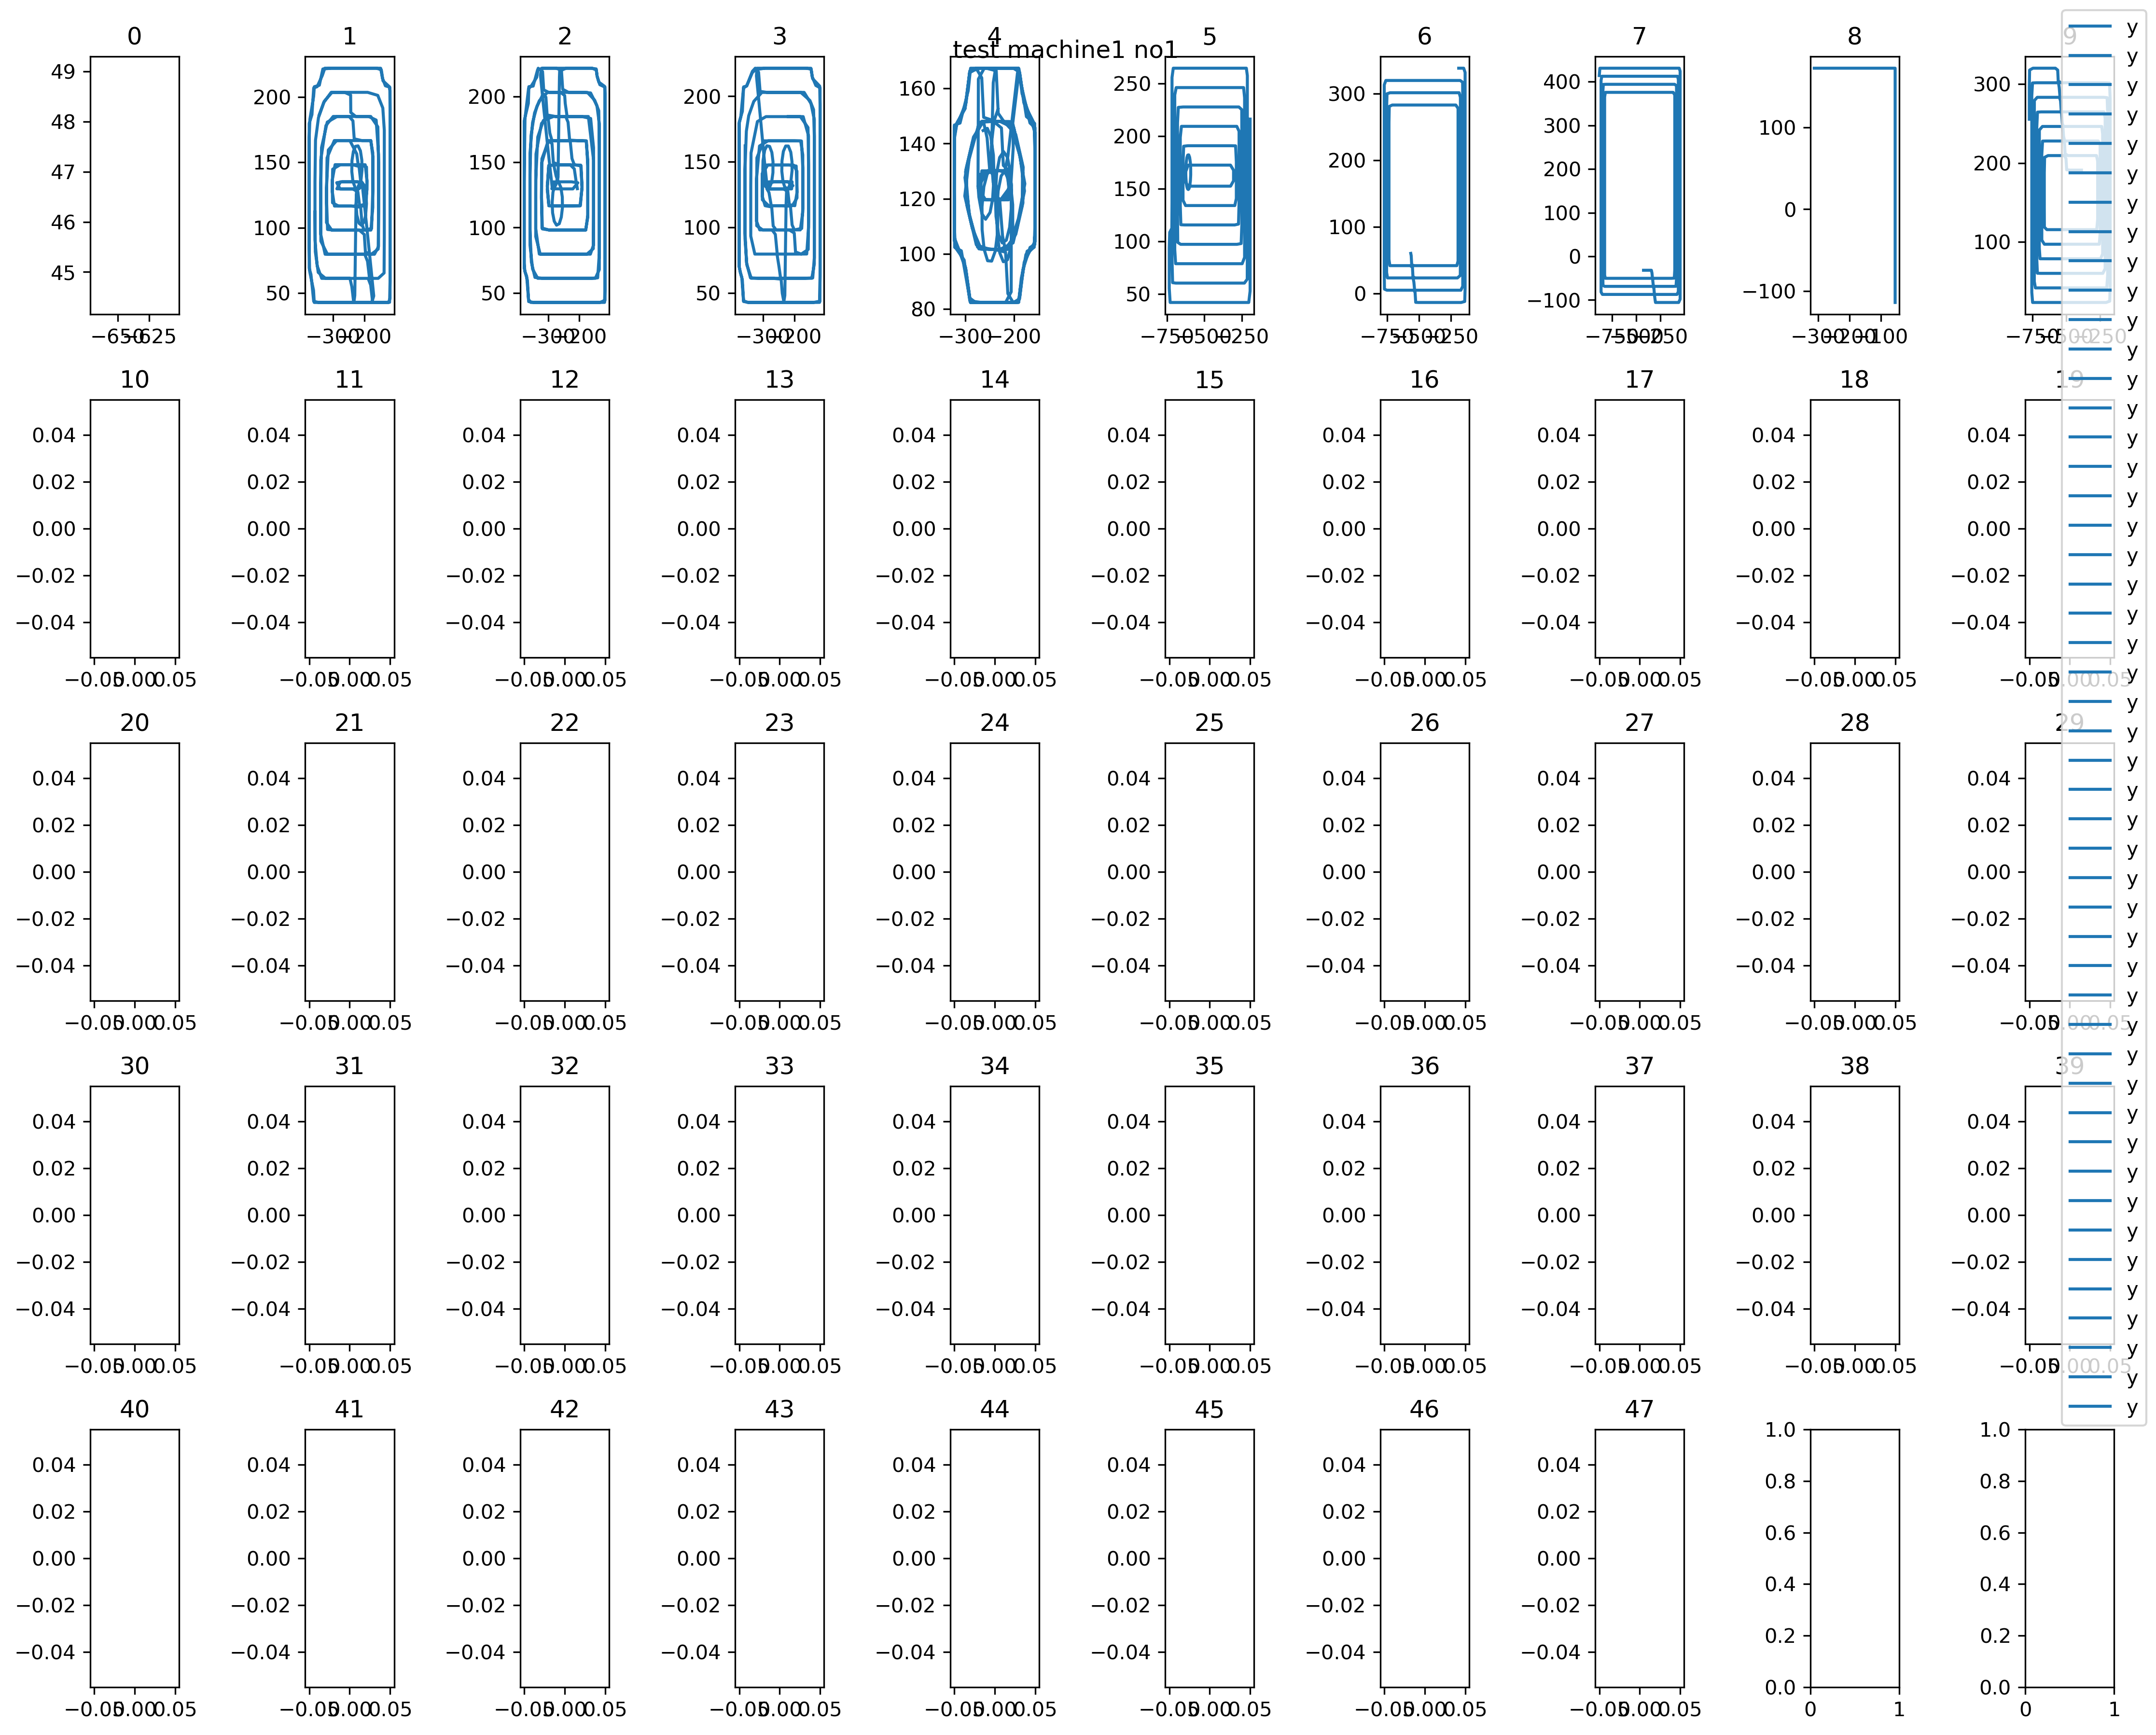

In [17]:
#仅仅plot  x-y关系
#不需要之前代买
figsize(15,12)

#读入PLC文件
df_all=pd.read_csv(TestFileList[0])


dflist=[]
for i in range(1,49):
    dfi=df_all[df_all.csv_no == i]
    dflist.append(dfi)

xlist=[]
ylist=[]
zlist=[]
loadlist=[]
for n in range(48):

    df=dflist[n]

    x=df['x']
    y=df['y']
    z=df['z']
    load=df['spindle_load']
    t=df['time']
    xlist.append(x)
    ylist.append(y)
    
print(len(xlist))

fig,ax=plt.subplots(5,10)
# plt.suptitle('machine 3 no'+str(num))

fig.size=(30,30)
ax=ax.flatten()
print(len(ax))

for n in range(48):
    ax[n].plot(xlist[n],ylist[n])
#     ax[n].plot(x)
    ax[n].set_title(str(n))
plt.suptitle('test machine1 no1')
fig.legend()
fig.tight_layout()

# 针对测试集plot

10
10


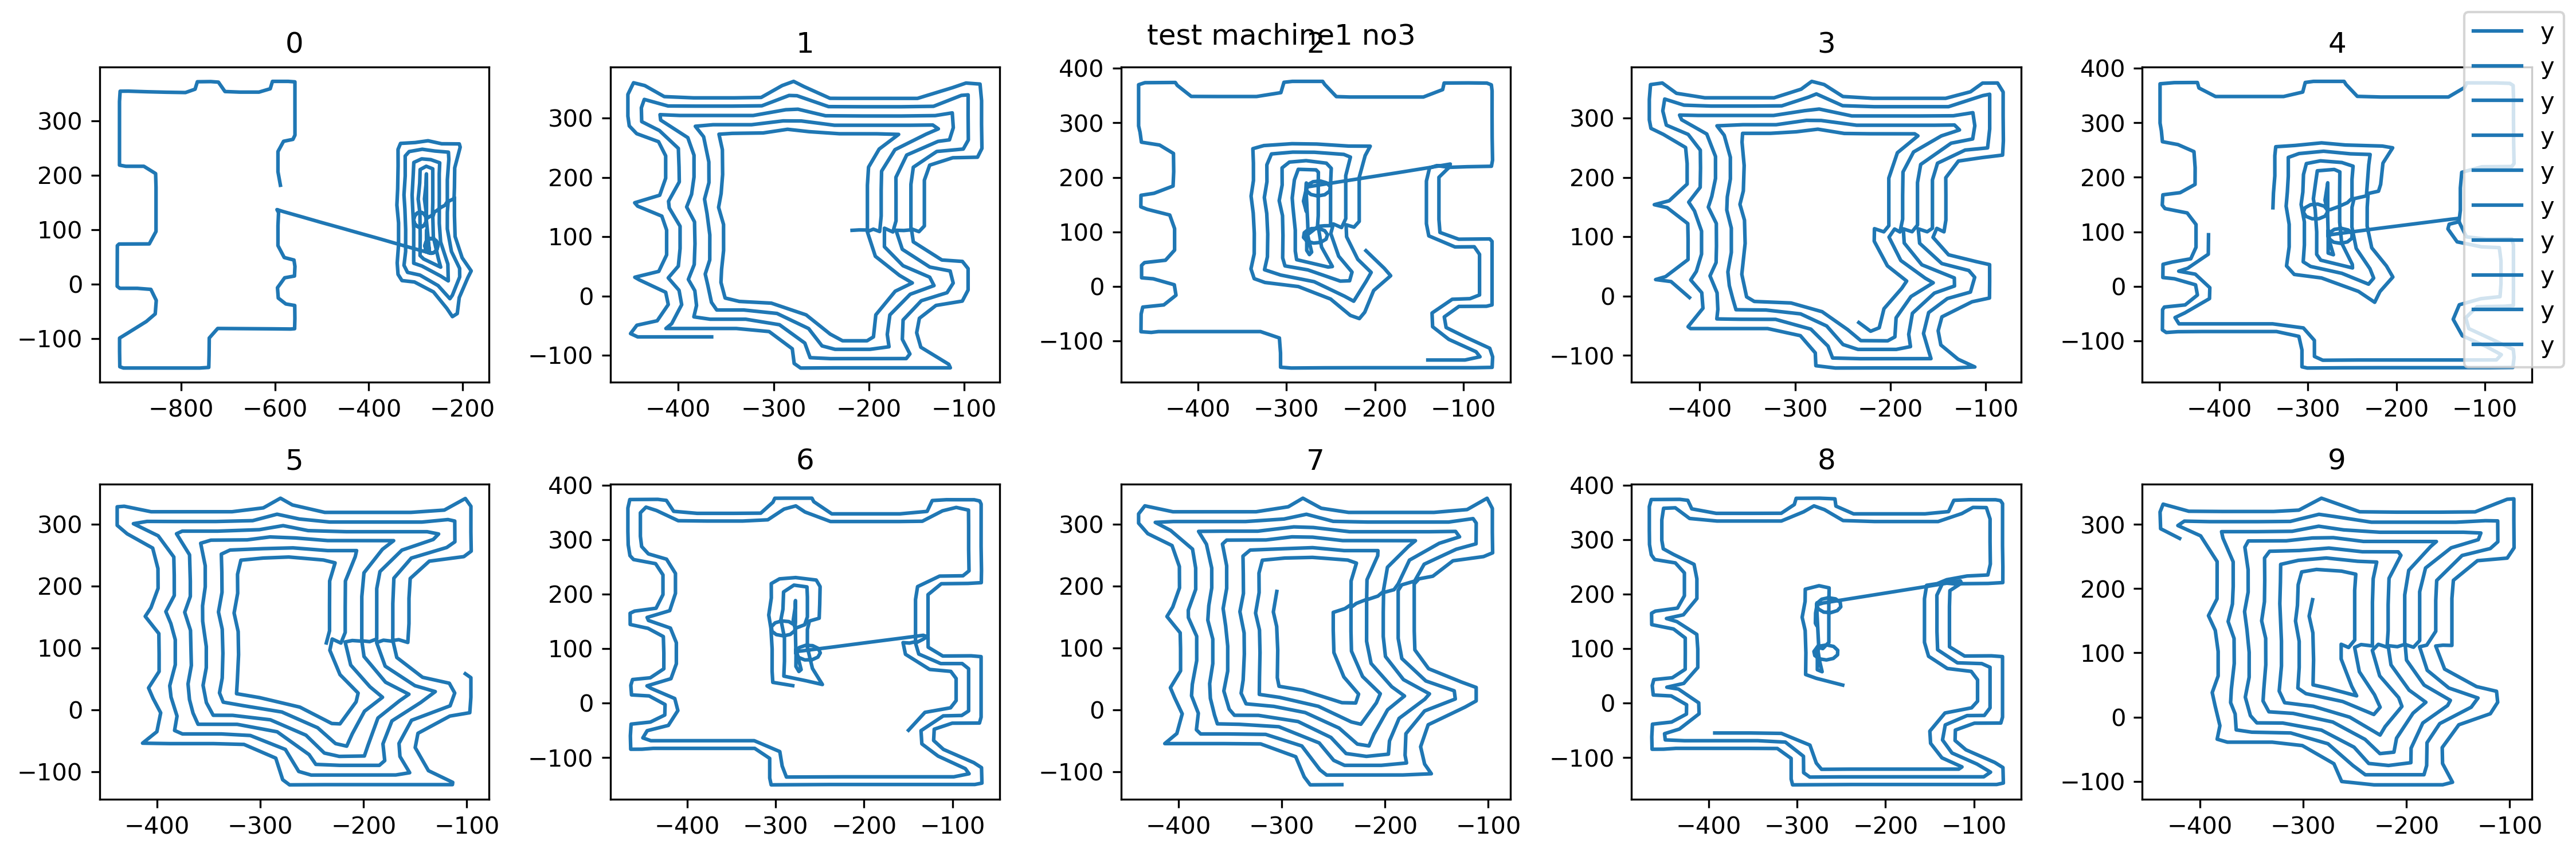

In [37]:
#仅仅plot  x-y关系
#不需要之前代买
figsize(15,5)

#读入PLC文件
df_all=pd.read_csv(TestFileList[4])


dflist=[]
for i in range(1,49):
    dfi=df_all[df_all.csv_no == i]
    dflist.append(dfi)

xlist=[]
ylist=[]
zlist=[]
loadlist=[]
for n in range(10):

    df=dflist[n]

    x=df['x']
    y=df['y']
    z=df['z']
    load=df['spindle_load']
    t=df['time']
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    loadlist.append(load)
    
print(len(xlist))

fig,ax=plt.subplots(2,5)
# plt.suptitle('machine 3 no'+str(num))

fig.size=(30,30)
ax=ax.flatten()
print(len(ax))

for n in range(10):
    ax[n].plot(xlist[n],ylist[n])
#     ax[n].plot(x)
    ax[n].set_title(str(n))
plt.suptitle('test machine1 no3')
fig.legend()
fig.tight_layout()

# 查看测试集z方向运动


10


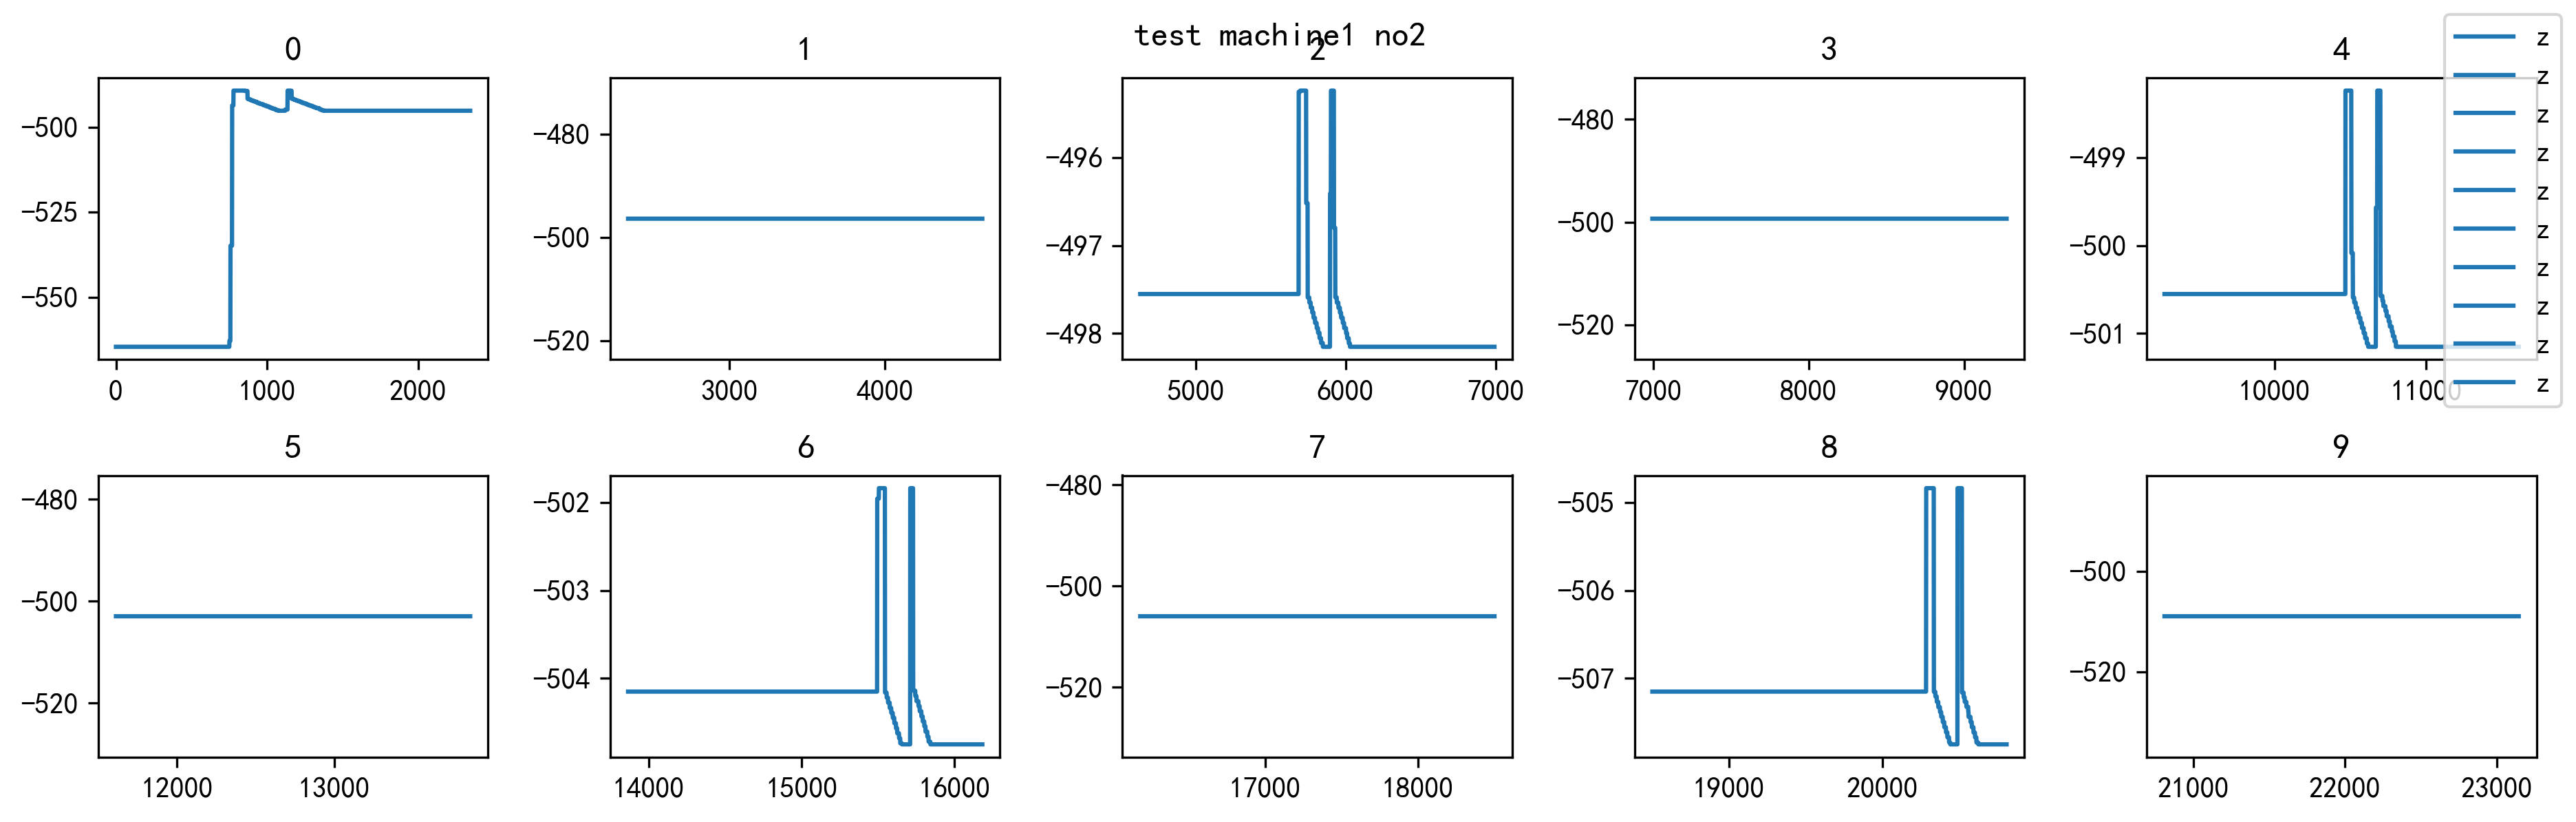

In [82]:
fig,ax=plt.subplots(2,5)
fig.size=(30,30)
ax=ax.flatten()
print(len(ax))

for n in range(10):
    ax[n].plot(zlist[n])
#     ax[n].plot(x)
    ax[n].set_title(str(n))
plt.suptitle('test machine1 no2')
fig.legend()
fig.tight_layout()

Text(0.5,1,'测试集，机器1，csv1')

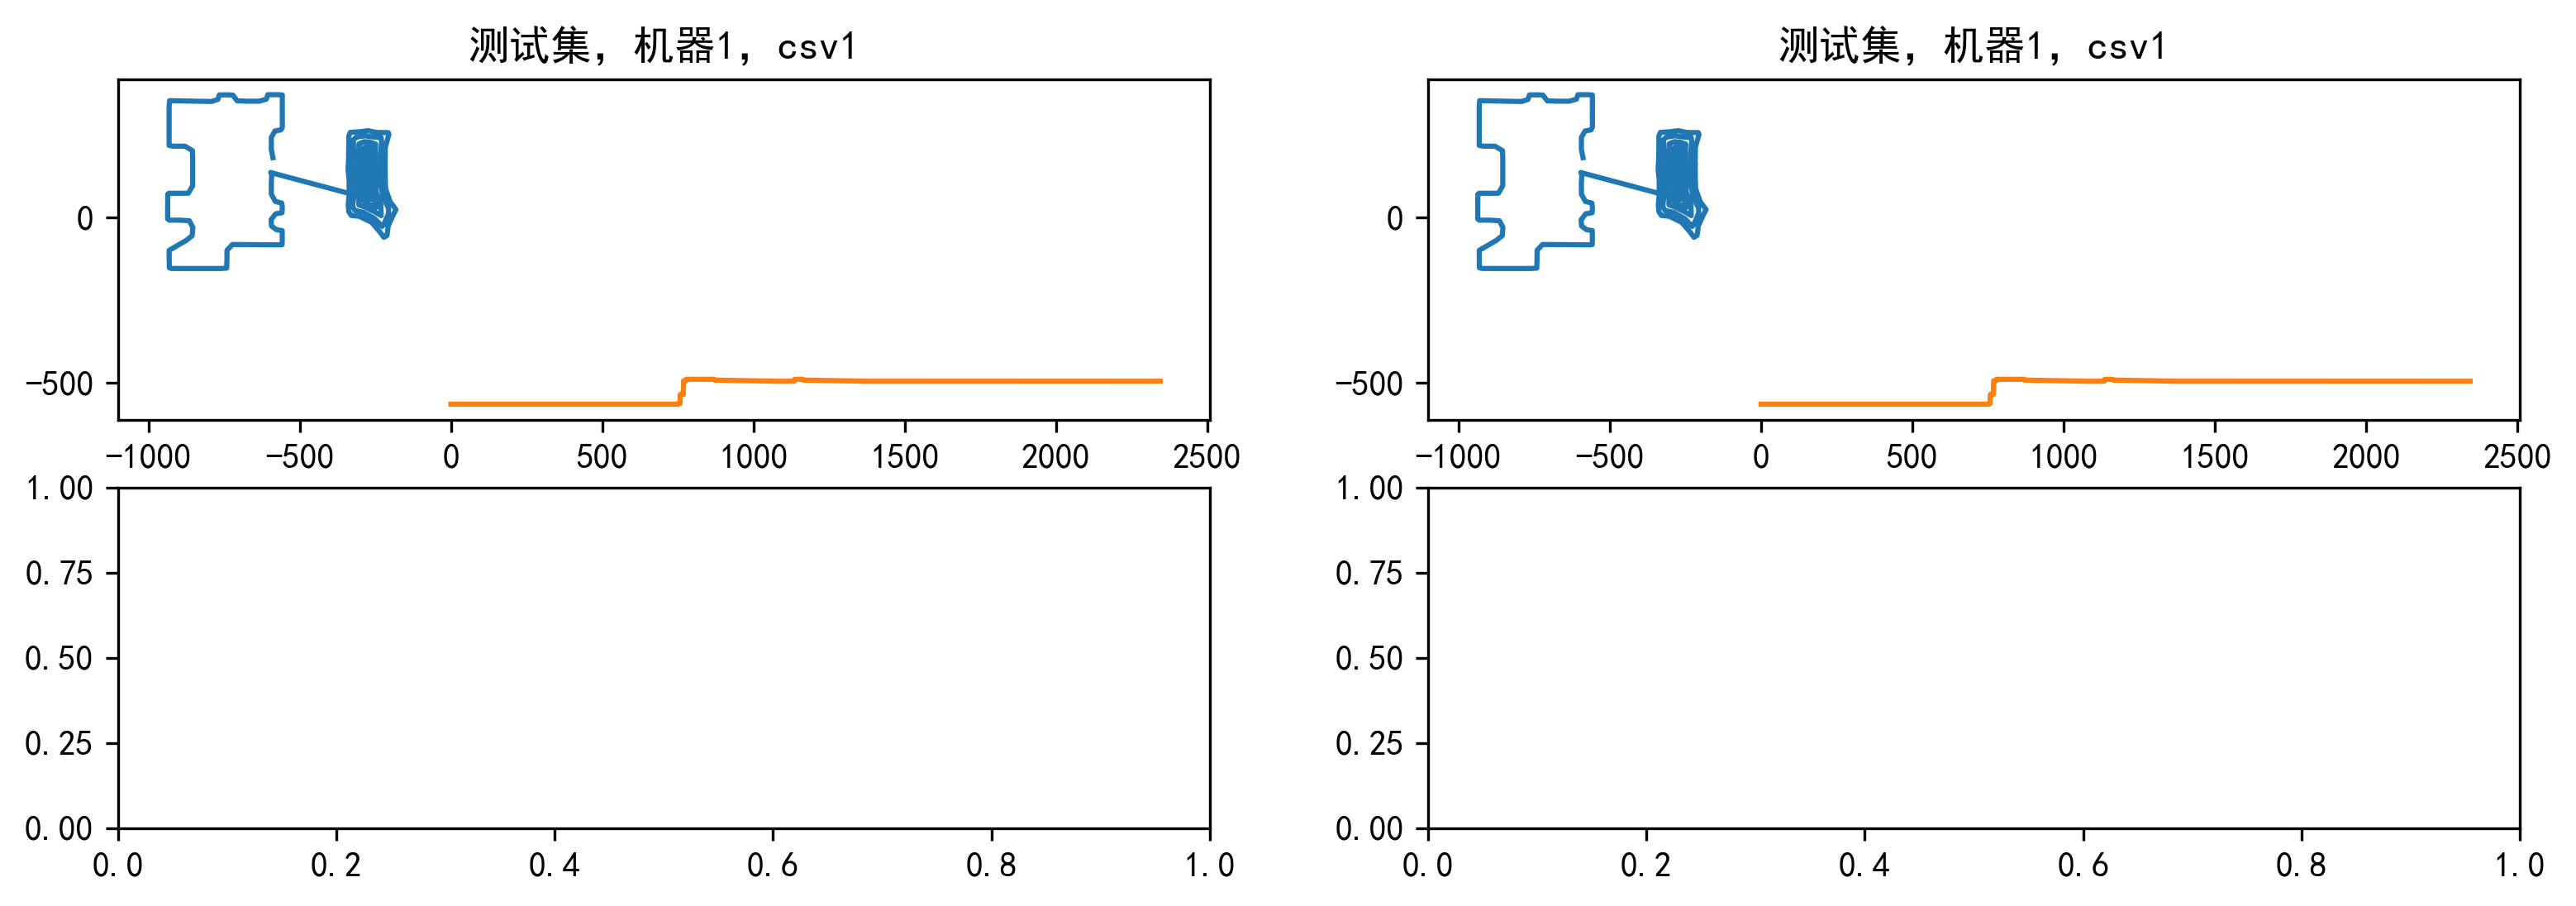

In [58]:
#3d图
fig,ax = plt.subplots(2,2)
ax[0,0] = Axes3D(fig)
ax[0,0].plot(xlist[0],ylist[0],zlist[0])
ax[0,0].set_title('测试集，机器1，csv1')

ax[0,1] = Axes3D(fig)
ax[0,1].plot(xlist[0],ylist[0],zlist[0])
ax[0,1].set_title('测试集，机器1，csv1')

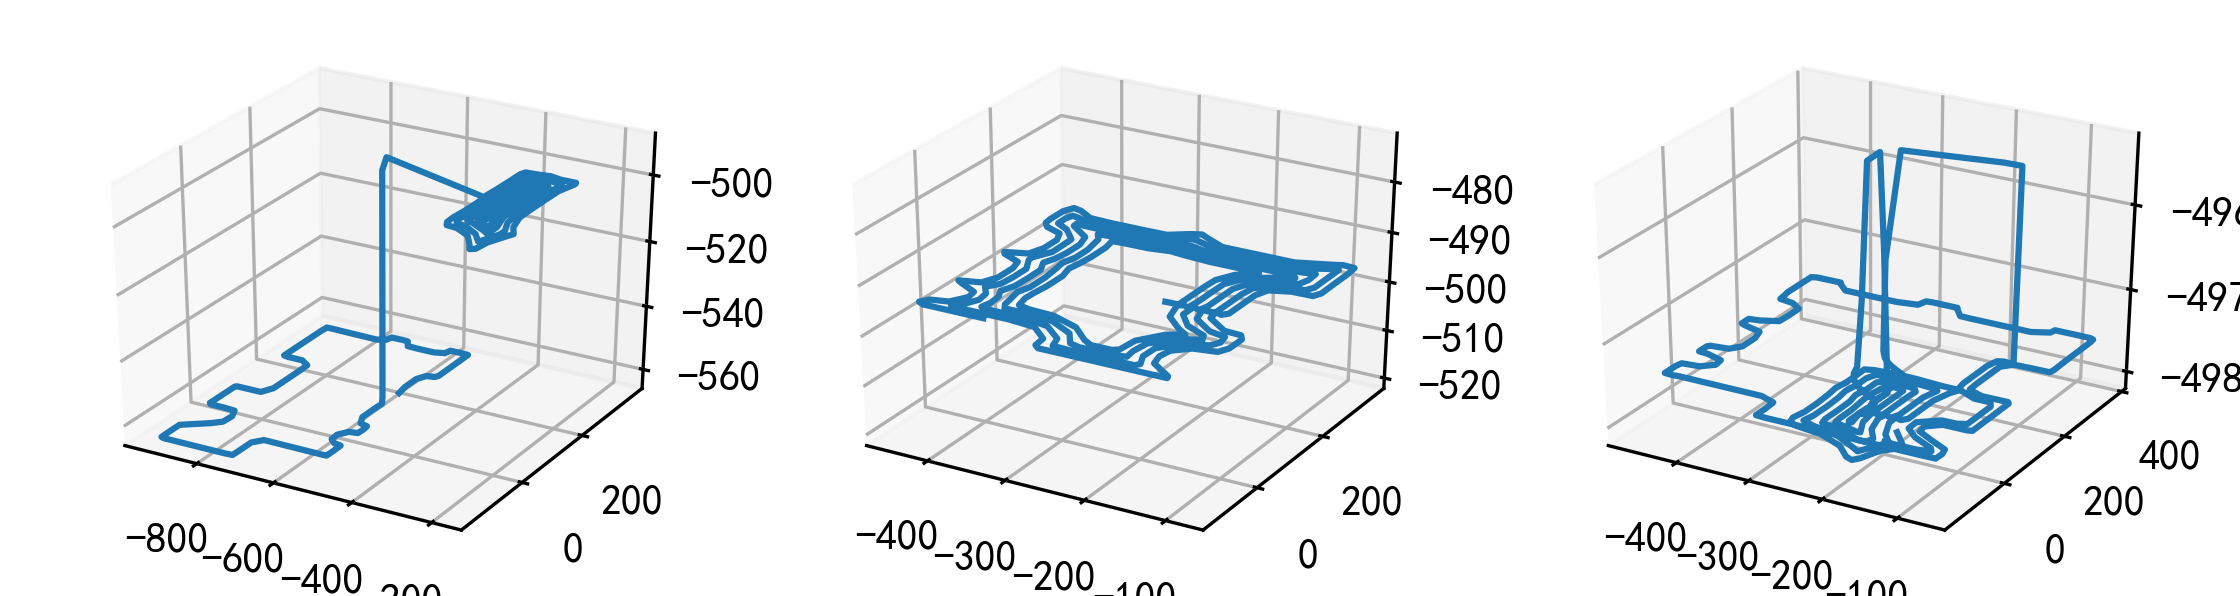

In [81]:
#多个3d图
fig=plt.figure()
ax1=fig.add_subplot(251,projection='3d')
ax1.plot(xlist[0],ylist[0],zlist[0])
ax1.set_xlabel('x')
ax2=fig.add_subplot(252,projection='3d')
ax2.plot(xlist[1],ylist[1],zlist[1])
ax3=fig.add_subplot(253,projection='3d')
ax3.plot(xlist[2],ylist[2],zlist[2])
fig.tight_layout()

In [70]:
#机器1中，no 13 csv只有一半的行数652800，
#看一下每一个行数 --》都在2200行左右

for i in range(0,49):
    print(dflist[i].describe().iloc[0,0])


2045.0
2327.0
2338.0
2275.0
2302.0
2267.0
2320.0
2277.0
2286.0
2320.0
2340.0
2273.0
2332.0
2362.0
2267.0
2324.0
2228.0
2232.0
2342.0
2267.0
2342.0
2258.0
2266.0
2312.0
2284.0
2347.0
2245.0
2330.0
2323.0
2310.0
2302.0
2290.0
2357.0
2236.0
2346.0
2279.0
2317.0
2292.0
2296.0
2325.0
2281.0
2289.0
2238.0
2304.0
2260.0
2348.0
2236.0
2290.0


IndexError: list index out of range

In [52]:
dflist[4].plot('time','x')
dflist[6].plot('time','x')
dflist[40].plot('time','x')
dflist[47].plot('time','x')


ValueError: 'y' is not a valid plot kind

#开始预处理部分，主要是产生一些新的feature，位移，速度，方向等 

In [16]:
#每一个df分别是1分钟
#需要将位置数据转化为速度数据，x,y,z方向的数据
#需要给整个df每一行添加一些新的feature，方向是否改变【0,1】，方向改变【0,x,y,z,xy,xz,yz,xyz...】

dflist=[]
for i in range(1,49):
    dfi=df_all[df_all.csv_no == i]
    dflist.append(dfi)

In [ ]:
#每一个

In [20]:
dflist[0].head(3)

,time,spindle_load,x,y,z,csv_no
0,11:28:07:127,0.0824,-20.9572,-17.6915,-89.6468,1
1,11:28:07:137,0.0824,-20.9572,-17.6915,-89.6468,1
2,11:28:07:147,0.0824,-20.9572,-17.6915,-89.6468,1


In [75]:
df1=dflist[0]
    

In [32]:
t1=dflist[0].iloc[0,0]
t2=dflist[0].iloc[1,0]

In [33]:
t1,t2

('11:28:07:127', '11:28:07:137')

TypeError: an integer is required (got type str)